In [ ]:
query = """
SELECT *
FROM `stockprediction-434721.stock_data.nflx_prices`
WHERE CAST(Date AS DATE) >= DATE_SUB(CURRENT_DATE(), INTERVAL 5 YEAR)
"""

nflx_df = client.query(query).to_dataframe()

In [ ]:
nflx_df.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2019-11-04 00:00:00+00:00,288.00,295.390015,287.160004,292.859985,292.859985,5566200,NFLX
1,2022-12-12 00:00:00+00:00,320.00,323.179993,308.850006,315.179993,315.179993,10148600,NFLX
2,2022-03-04 00:00:00+00:00,368.00,374.820007,357.170013,361.730011,361.730011,5325500,NFLX
3,2020-06-08 00:00:00+00:00,416.00,420.799988,406.500000,419.489990,419.489990,5851500,NFLX
4,2023-08-29 00:00:00+00:00,416.00,432.170013,414.500000,429.989990,429.989990,4486700,NFLX
5,2020-11-16 00:00:00+00:00,480.00,485.579987,477.299988,479.100006,479.100006,3953600,NFLX
6,2024-04-01 00:00:00+00:00,608.00,615.109985,605.570007,614.309998,614.309998,2115900,NFLX
7,2022-02-02 00:00:00+00:00,448.25,451.980011,426.480011,429.480011,429.480011,14346000,NFLX
8,2021-03-12 00:00:00+00:00,512.50,526.510010,506.589996,518.020020,518.020020,3981700,NFLX
9,2021-08-04 00:00:00+00:00,513.00,517.979980,510.369995,517.349976,517.349976,2039400,NFLX


**CLEANING AND PREPROCESSING:**

In [ ]:
# Check for any missing or null values
print(nflx_df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticker       0
dtype: int64


In [ ]:
import pandas as pd
# Ensure that Date is in datetime format
nflx_df['Date'] = pd.to_datetime(nflx_df['Date'])

In [ ]:
# Drop columns that are not necessary for modeling
# Adjust this based on your needs
nflx_df = nflx_df.drop(columns=['Adj Close'])

In [ ]:
# Sort data by Date in ascending order
nflx_df = nflx_df.sort_values(by='Date', ascending=True)

In [ ]:
# Preview updated dataframes
print(nflx_df.head())

                          Date        Open        High         Low  \
420  2019-09-16 00:00:00+00:00  294.230011  297.429993  289.779999   
101  2019-09-17 00:00:00+00:00  294.500000  299.149994  291.790009   
307  2019-09-18 00:00:00+00:00  294.989990  296.049988  287.450012   
1102 2019-09-19 00:00:00+00:00  291.559998  293.809998  283.399994   
252  2019-09-20 00:00:00+00:00  280.260010  282.500000  266.000000   

           Close    Volume Ticker  
420   294.290009   5307400   NFLX  
101   298.600006   4777100   NFLX  
307   291.559998   7811100   NFLX  
1102  286.600006   8461300   NFLX  
252   270.750000  23832800   NFLX  


**FEATURE ENGINEERING:**

1. Create Rolling Features:
Moving Averages (e.g., 7-day, 30-day): These smooth out stock prices and reveal trends.
Volatility (Standard deviation of returns): Indicates stock price variability.
2. Create Lag Features:
Previous day's prices: Prices from a few days ago can help the model see short-term trends.
3. Compute Returns:
Daily returns: Percentage change from one day to the next.

In [ ]:
# Feature Engineering for netflix

# 1. Moving Averages
nflx_df['7_day_MA'] = nflx_df['Close'].rolling(window=7).mean()
nflx_df['30_day_MA'] = nflx_df['Close'].rolling(window=30).mean()

# 2. Volatility (Standard deviation of daily returns over 7 and 30 days)
nflx_df['7_day_volatility'] = nflx_df['Close'].pct_change().rolling(window=7).std()
nflx_df['30_day_volatility'] = nflx_df['Close'].pct_change().rolling(window=30).std()

# 3. Lag Features (Previous day's price and volume)
nflx_df['Previous_Close'] = nflx_df['Close'].shift(1)
nflx_df['Previous_Volume'] = nflx_df['Volume'].shift(1)

# 4. Daily Returns
nflx_df['Daily_Return'] = nflx_df['Close'].pct_change()

# Preview updated dataframe for netflix
print(nflx_df.head())

                          Date        Open        High         Low  \
420  2019-09-16 00:00:00+00:00  294.230011  297.429993  289.779999   
101  2019-09-17 00:00:00+00:00  294.500000  299.149994  291.790009   
307  2019-09-18 00:00:00+00:00  294.989990  296.049988  287.450012   
1102 2019-09-19 00:00:00+00:00  291.559998  293.809998  283.399994   
252  2019-09-20 00:00:00+00:00  280.260010  282.500000  266.000000   

           Close    Volume Ticker  7_day_MA  30_day_MA  7_day_volatility  \
420   294.290009   5307400   NFLX       NaN        NaN               NaN   
101   298.600006   4777100   NFLX       NaN        NaN               NaN   
307   291.559998   7811100   NFLX       NaN        NaN               NaN   
1102  286.600006   8461300   NFLX       NaN        NaN               NaN   
252   270.750000  23832800   NFLX       NaN        NaN               NaN   

      30_day_volatility  Previous_Close  Previous_Volume  Daily_Return  
420                 NaN             NaN          

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Ticker                0
7_day_MA              6
30_day_MA            29
7_day_volatility      7
30_day_volatility    30
Previous_Close        1
Previous_Volume       1
Daily_Return          1
dtype: int64


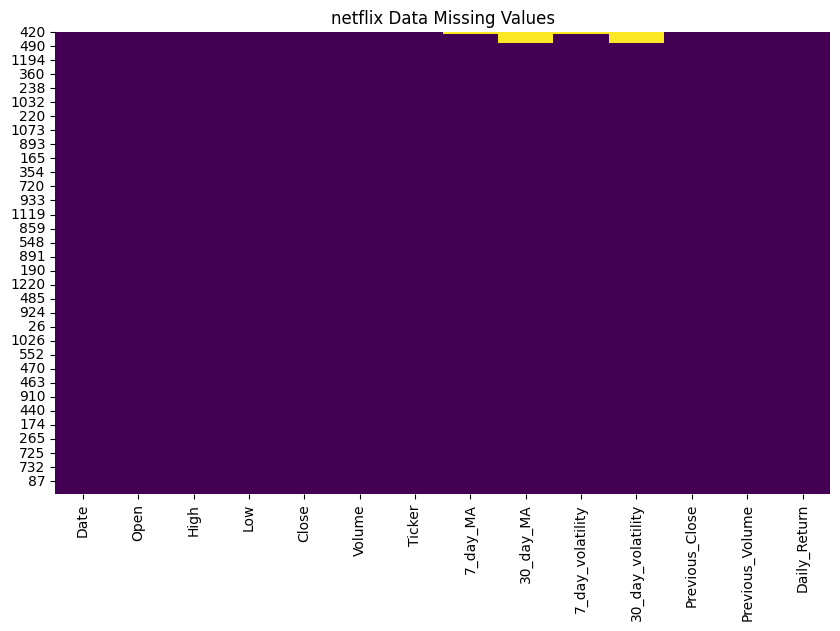

In [ ]:
# Check for missing values in each column for netflix
print(nflx_df.isna().sum())

# Visualize where NaNs occur in netflix data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(nflx_df.isna(), cbar=False, cmap="viridis")
plt.title('netflix Data Missing Values')
plt.show()

Based on the heatmaps and summary, it looks like the missing values are indeed concentrated at the beginning of each dataset, particularly in the moving averages and volatility columns. Since these are rolling calculations, it's normal to see NaN values at the start.

It would be appropriate to drop the rows that contain these NaN values since they appear at the beginning and are not informative for future predictions.

In [ ]:
# Drop rows with NaN values in the netflix dataframe
nflx_df_cleaned = nflx_df.dropna()

# Preview the cleaned netflix dataframe
print(nflx_df_cleaned.head())

                          Date        Open        High         Low  \
1061 2019-10-28 00:00:00+00:00  278.049988  285.750000  277.350006   
852  2019-10-29 00:00:00+00:00  281.869995  284.410004  277.549988   
940  2019-10-30 00:00:00+00:00  284.339996  293.489990  283.000000   
44   2019-10-31 00:00:00+00:00  291.000000  291.450012  284.779999   
483  2019-11-01 00:00:00+00:00  288.700012  289.119995  283.019989   

           Close   Volume Ticker    7_day_MA   30_day_MA  7_day_volatility  \
1061  281.859985  6248400   NFLX  274.498566  275.078332          0.032596   
852   281.209991  4356200   NFLX  275.342852  274.498664          0.021261   
940   291.450012  9345600   NFLX  277.257141  274.494998          0.024724   
44    287.410004  5090000   NFLX  280.217141  274.521998          0.016872   
483   286.809998  5594300   NFLX  282.437143  275.057331          0.017238   

      30_day_volatility  Previous_Close  Previous_Volume  Daily_Return  
1061           0.025349      276.8200

In [ ]:
print(nflx_df_cleaned.shape)

(1221, 14)


Exporting to CSV to update BigQuery table:

In [ ]:
# Define the filename for the NFLX dataframe
nflx_csv_filename = "nflx_cleaned_feature_engineered.csv"

# Export the cleaned NFLX dataframe to CSV
nflx_df_cleaned.to_csv(nflx_csv_filename, index=False)

print(f"Dataframe exported to CSV: {nflx_csv_filename}")

Dataframe exported to CSV: nflx_cleaned_feature_engineered.csv


In [ ]:
from google.colab import files

# Download the Netflix CSV file to your local machine
files.download('nflx_cleaned_feature_engineered.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**MODEL TRAINING:**

Step 1: Split the Data into Training and Testing Sets

* Training Set: 80% of the data, used to train the model.
* Testing Set: 20% of the data, used to evaluate the model's accuracy.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X_nflx = nflx_df_cleaned[['7_day_MA', '30_day_MA', '7_day_volatility', '30_day_volatility', 'Previous_Close', 'Previous_Volume', 'Daily_Return']]
y_nflx = nflx_df_cleaned['Close']

# Split the data
X_train_nflx, X_test_nflx, y_train_nflx, y_test_nflx = train_test_split(X_nflx, y_nflx, test_size=0.2, random_state=42)

# Preview the shapes
print(X_train_nflx.shape, X_test_nflx.shape, y_train_nflx.shape, y_test_nflx.shape)

(976, 7) (245, 7) (976,) (245,)


Step 2: Select Machine Learning Models

* Start with Linear Regression for simplicity and benchmarking.
* Move to Random Forest or XGBoost to capture more complex patterns.
* Optionally, explore ARIMA or LSTM if you want a time-series-specific model.

**LINEAR REGRESSION MODEL:**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model_nflx = LinearRegression()

# Train the model on the training data
model_nflx.fit(X_train_nflx, y_train_nflx)

# Predict on the test data
y_pred_nflx = model_nflx.predict(X_test_nflx)

# Evaluate the model
mse_nflx = mean_squared_error(y_test_nflx, y_pred_nflx)
r2_nflx = r2_score(y_test_nflx, y_pred_nflx)

print("netflix Linear Regression Performance:")
print(f"Mean Squared Error: {mse_nflx}")
print(f"R-squared: {r2_nflx}")

netflix Linear Regression Performance:
Mean Squared Error: 10.327358375173077
R-squared: 0.9993540336227533


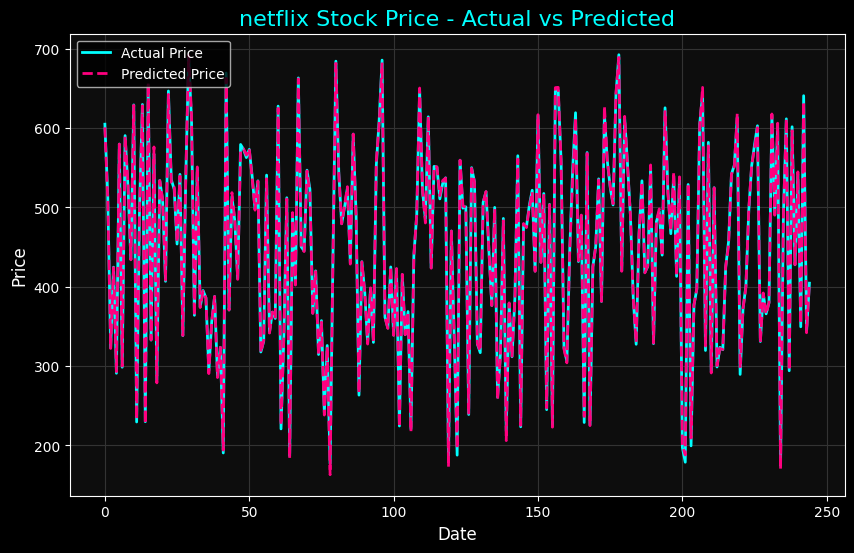

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the cyberpunk theme colors
cyberpunk_blue = '#00FFFF'
cyberpunk_red = '#FF007F'
cyberpunk_background = '#0D0D0D'

# Customize the plot style
plt.style.use('dark_background')

# Plot for netflix stock
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test_nflx)), y_test_nflx, color=cyberpunk_blue, label='Actual Price', linewidth=2)
plt.plot(np.arange(len(y_pred_nflx)), y_pred_nflx, color=cyberpunk_red, linestyle='--', label='Predicted Price', linewidth=2)
plt.title('netflix Stock Price - Actual vs Predicted', fontsize=16, color=cyberpunk_blue)
plt.xlabel('Date', fontsize=12, color='white')
plt.ylabel('Price', fontsize=12, color='white')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, color='#333333')
plt.gca().set_facecolor(cyberpunk_background)
plt.show()

**RANDOM FOREST MODEL:**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model for netflix
rf_nflx = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_nflx.fit(X_train_nflx, y_train_nflx)

# Predict on the test data
y_pred_rf_nflx = rf_nflx.predict(X_test_nflx)

# Evaluate the model
mse_rf_nflx = mean_squared_error(y_test_nflx, y_pred_rf_nflx)
r2_rf_nflx = r2_score(y_test_nflx, y_pred_rf_nflx)

print("netflix Random Forest Performance:")
print(f"Mean Squared Error: {mse_rf_nflx}")
print(f"R-squared: {r2_rf_nflx}")

netflix Random Forest Performance:
Mean Squared Error: 25.232584603717342
R-squared: 0.9984217259948858


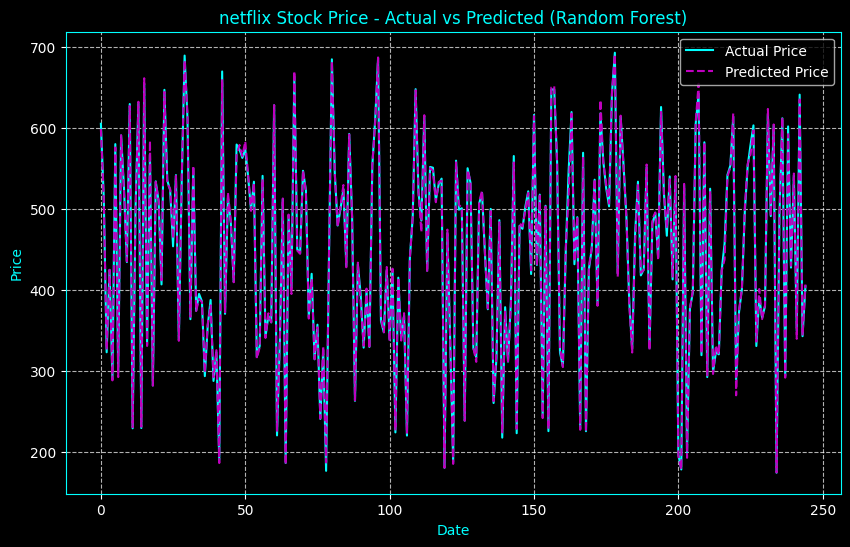

In [ ]:
# Visualization for Random Forest - netflix
plt.figure(figsize=(10, 6))
plt.plot(y_test_nflx[:250].values, color="cyan", label="Actual Price")
plt.plot(y_pred_rf_nflx[:250], 'm--', label="Predicted Price")
plt.title("netflix Stock Price - Actual vs Predicted (Random Forest)", color="cyan")
plt.xlabel("Date", color="cyan")
plt.ylabel("Price", color="cyan")
plt.legend(loc="best")
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor("black")
plt.gca().spines["bottom"].set_color("cyan")
plt.gca().spines["top"].set_color("cyan")
plt.gca().spines["left"].set_color("cyan")
plt.gca().spines["right"].set_color("cyan")
plt.show()

FEATURE IMPORTANCE ANALYSIS:

explore which features (7-day MA, 30-day volatility, etc.) had the most influence on the stock price predictions.

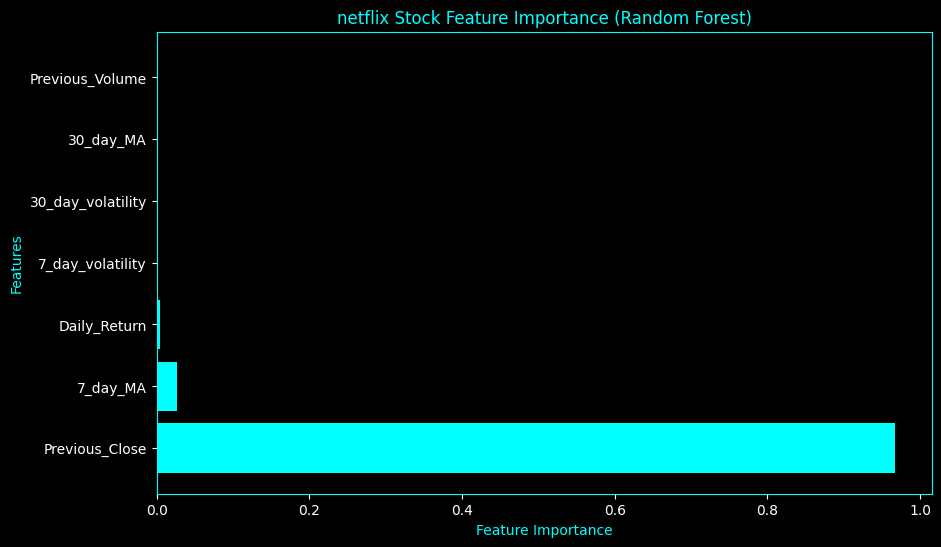

In [ ]:
# Get feature importance from the Random Forest model
importances_nflx = rf_nflx.feature_importances_

# Create a dataframe for the features and their importance
feature_names_nflx = X_train_nflx.columns
importance_df_nflx = pd.DataFrame({
    'Feature': feature_names_nflx,
    'Importance': importances_nflx
})

# Sort the dataframe by importance
importance_df_nflx = importance_df_nflx.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df_nflx['Feature'], importance_df_nflx['Importance'], color='cyan')
plt.xlabel('Feature Importance', color='cyan')
plt.ylabel('Features', color='cyan')
plt.title('netflix Stock Feature Importance (Random Forest)', color='cyan')
plt.gca().set_facecolor('black')
plt.gca().spines['bottom'].set_color('cyan')
plt.gca().spines['top'].set_color('cyan')
plt.gca().spines['left'].set_color('cyan')
plt.gca().spines['right'].set_color('cyan')
plt.show()

**GRADIENT BOOSTING REGRESSOR:**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Gradient Boosting model for netflix
gb_nflx = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
gb_nflx.fit(X_train_nflx, y_train_nflx)

# Predict on the test data
y_pred_gb_nflx = gb_nflx.predict(X_test_nflx)

# Evaluate the model
mse_gb_nflx = mean_squared_error(y_test_nflx, y_pred_gb_nflx)
r2_gb_nflx = r2_score(y_test_nflx, y_pred_gb_nflx)

print("netflix Gradient Boosting Performance:")
print(f"Mean Squared Error: {mse_gb_nflx}")
print(f"R-squared: {r2_gb_nflx}")

netflix Gradient Boosting Performance:
Mean Squared Error: 14.971628008497358
R-squared: 0.9990635390043805


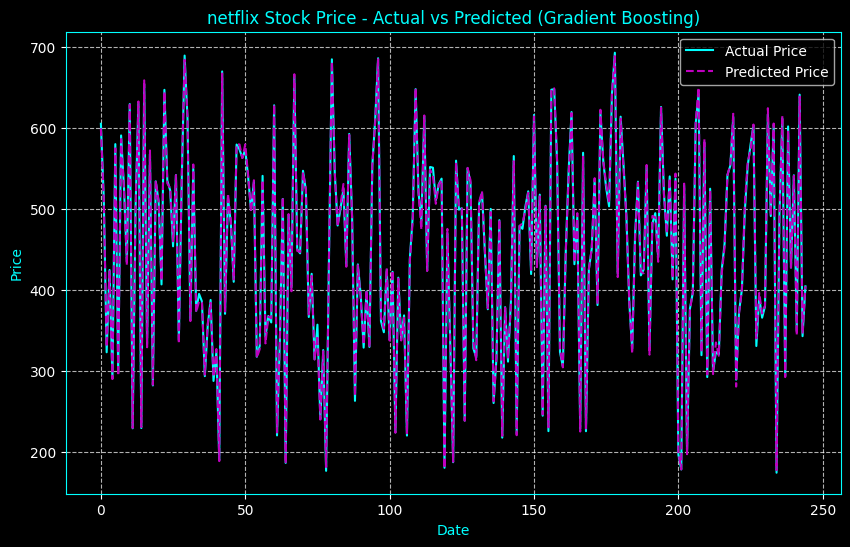

In [ ]:
# Visualization for Gradient Boosting - netflix
plt.figure(figsize=(10, 6))
plt.plot(y_test_nflx[:250].values, color="cyan", label="Actual Price")
plt.plot(y_pred_gb_nflx[:250], 'm--', label="Predicted Price")
plt.title("netflix Stock Price - Actual vs Predicted (Gradient Boosting)", color="cyan")
plt.xlabel("Date", color="cyan")
plt.ylabel("Price", color="cyan")
plt.legend(loc="best")
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor("black")
plt.gca().spines["bottom"].set_color("cyan")
plt.gca().spines["top"].set_color("cyan")
plt.gca().spines["left"].set_color("cyan")
plt.gca().spines["right"].set_color("cyan")
plt.show()

HYPERPARAMTER TUNING:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
gb_nflx = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_nflx = GridSearchCV(estimator=gb_nflx, param_grid=param_grid,
                                cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search_nflx.fit(X_train_nflx, y_train_nflx)

# Get the best parameters
best_params_nflx = grid_search_nflx.best_params_
print("Best parameters for netflix:", best_params_nflx)

# Evaluate the model with the best parameters
best_gb_nflx = grid_search_nflx.best_estimator_
y_pred_nflx = best_gb_nflx.predict(X_test_nflx)
mse_nflx = mean_squared_error(y_test_nflx, y_pred_nflx)
r2_nflx = r2_score(y_test_nflx, y_pred_nflx)

print(f"netflix Gradient Boosting Performance (Tuned):")
print(f"Mean Squared Error: {mse_nflx}")
print(f"R-squared: {r2_nflx}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for netflix: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
netflix Gradient Boosting Performance (Tuned):
Mean Squared Error: 10.105235803043964
R-squared: 0.9993679271769431


the hyperparameter tuning for netflix has finished successfully, and the best parameters have been found. The performance has improved with a lower mean squared error (MSE) after tuning.


SAVING THE TUNED MODEL:

In [ ]:
import joblib
joblib.dump(best_gb_nflx, 'best_gb_nflx_model.pkl')

['best_gb_nflx_model.pkl']

**Long Short-Term Memory (LSTM) Neural Network for stock price prediction:**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Feature scaling
scaler = StandardScaler()
X_train_nflx_scaled = scaler.fit_transform(X_train_nflx)
X_test_nflx_scaled = scaler.transform(X_test_nflx)

# Define the neural network model
model_nflx = Sequential([
    Dense(64, input_dim=X_train_nflx.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model_nflx.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_nflx = model_nflx.fit(X_train_nflx_scaled, y_train_nflx, validation_split=0.2, epochs=50, batch_size=32)

# Predict on the test set
y_pred_nn_nflx = model_nflx.predict(X_test_nflx_scaled)

# Evaluate the performance
mse_nflx_nn = mean_squared_error(y_test_nflx, y_pred_nn_nflx)
r2_nflx_nn = r2_score(y_test_nflx, y_pred_nn_nflx)

print(f"netflix Neural Network Performance:")
print(f"Mean Squared Error: {mse_nflx_nn}")
print(f"R-squared: {r2_nflx_nn}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 216253.6562 - val_loss: 208144.9375
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 209883.8125 - val_loss: 205257.5781
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 210636.1406 - val_loss: 199611.3281
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 210627.8125 - val_loss: 189762.2500
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 192534.0156 - val_loss: 174328.0000
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 170550.0156 - val_loss: 152279.5938
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 146364.9375 - val_loss: 124636.0078
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 120195.6875 - val_loss: 94882.2109
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 89684.1172 - val_loss: 67454.3984
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 65154.5469 - val_loss: 48020.7188
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47875.6992 - va

Notes:
You can adjust the number of neurons, layers, epochs, and batch size to optimize the model.
The StandardScaler ensures that all features are on the same scale, which is important for neural networks.
The models are trained for 50 epochs, but you can adjust the number of epochs based on the performance.


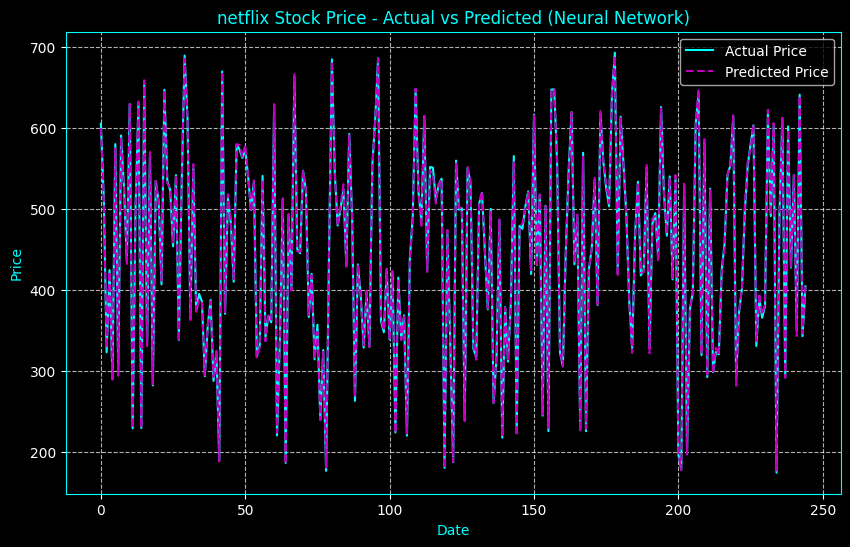

In [ ]:
# netflix Neural Network Predictions Visualization
plt.figure(figsize=(10, 6))
plt.plot(y_test_nflx[:250].values, color="cyan", label="Actual Price")
plt.plot(y_pred_nflx[:250], 'm--', label="Predicted Price")
plt.title("netflix Stock Price - Actual vs Predicted (Neural Network)", color="cyan")
plt.xlabel("Date", color="cyan")
plt.ylabel("Price", color="cyan")
plt.legend(loc="best")
plt.grid(True, linestyle="--", alpha=0.7)
plt.gca().set_facecolor("black")
plt.gca().spines["bottom"].set_color("cyan")
plt.gca().spines["top"].set_color("cyan")
plt.gca().spines["left"].set_color("cyan")
plt.gca().spines["right"].set_color("cyan")
plt.show()

In [ ]:
# Save the Neural Network model for netflix in the native Keras format
model_nflx.save('best_nn_nflx_model_tuned.keras')

In [ ]:
joblib.dump(model_nflx, 'linear_reg_nflx_model.pkl')

['linear_reg_nflx_model.pkl']

In [ ]:
joblib.dump(rf_nflx, 'random_forest_nflx_model.pkl')

['random_forest_nflx_model.pkl']

In [ ]:
joblib.dump(best_gb_nflx, 'gradient_boost_nflx_model.pkl')

['gradient_boost_nflx_model.pkl']

In [ ]:
# Load all Models for netflix:

from tensorflow.keras.models import load_model

# Load Linear Regression model
linear_reg_nflx_model = joblib.load('linear_reg_nflx_model.pkl')

# Load Random Forest model
random_forest_nflx_model = joblib.load('random_forest_nflx_model.pkl')

# Load Gradient Boosting model
gradient_boost_nflx_model = joblib.load('gradient_boost_nflx_model.pkl')

# Load Neural Network model for netflix
best_nn_nflx_model = load_model('best_nn_nflx_model_tuned.keras')

In [ ]:
from google.colab import files

# Download the saved models to your local machine
files.download('linear_reg_nflx_model.pkl')
files.download('random_forest_nflx_model.pkl')
files.download('gradient_boost_nflx_model.pkl')
files.download('best_nn_nflx_model_tuned.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Dashboard:**

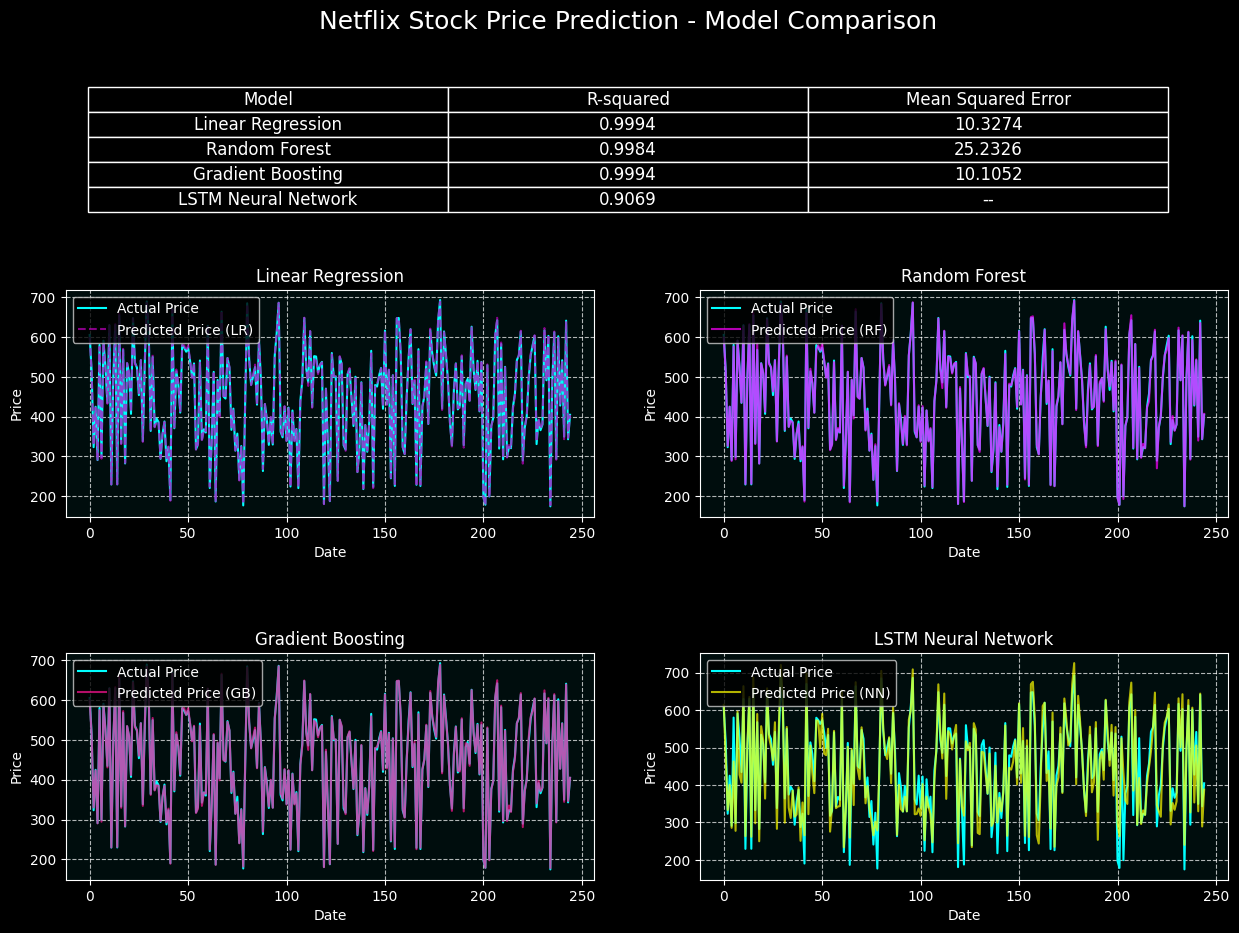

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors
cyberpunk_blue = '#00FFFF'
cyberpunk_pink = '#FF1493'  # Pink color for Gradient Boosting
cyberpunk_background = '#000D0D'
random_forest_color = '#FF00FF'  # Magenta for Random Forest
lstm_color = '#FFFF00'  # Yellow for LSTM

# Create subplots: 2 rows, 2 columns
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.6, top=0.70)  # Adjusting space between the charts and shifting top margin for title

# Title for the entire figure
fig.suptitle('Netflix Stock Price Prediction - Model Comparison', fontsize=18, color='white')

# Table with model performance metrics
table_data = [
    ["Model", "R-squared", "Mean Squared Error"],
    ["Linear Regression", round(0.9994, 4), round(10.3274, 4)],
    ["Random Forest", round(0.9984, 4), round(25.2326, 4)],
    ["Gradient Boosting", round(0.9994, 4), round(10.1052, 4)],
    ["LSTM Neural Network", round(0.9069, 4), "--"]  # Replacing the LSTM MSE with "--"
]

# Add the table without extra space
ax_table = fig.add_axes([0.1, 0.78, 0.8, 0.12])  # Shifting the table slightly lower
ax_table.axis('off')
table = ax_table.table(cellText=table_data, colWidths=[0.3]*3, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

# Set table background to black and text to white
for key, cell in table.get_celld().items():
    cell.set_edgecolor('white')
    cell.set_text_props(color='white')
    cell.set_facecolor('black')

# Plot 1: Linear Regression
axs[0, 0].plot(np.arange(len(y_test_nflx[:250])), y_test_nflx[:250], color=cyberpunk_blue, label='Actual Price')
axs[0, 0].plot(np.arange(len(y_pred_nflx[:250])), y_pred_nflx[:250], 'm--', label='Predicted Price (LR)', alpha=0.7)
axs[0, 0].set_title('Linear Regression', fontsize=12, color='white')
axs[0, 0].set_xlabel('Date', fontsize=10, color='white')
axs[0, 0].set_ylabel('Price', fontsize=10, color='white')
axs[0, 0].legend(loc='upper left')
axs[0, 0].grid(True, linestyle='--', alpha=0.7)
axs[0, 0].set_facecolor(cyberpunk_background)

# Plot 2: Random Forest (Magenta)
axs[0, 1].plot(np.arange(len(y_test_nflx[:250])), y_test_nflx[:250], color=cyberpunk_blue, label='Actual Price')
axs[0, 1].plot(np.arange(len(y_pred_rf_nflx[:250])), y_pred_rf_nflx[:250], color=random_forest_color, label='Predicted Price (RF)', alpha=0.7)
axs[0, 1].set_title('Random Forest', fontsize=12, color='white')
axs[0, 1].set_xlabel('Date', fontsize=10, color='white')
axs[0, 1].set_ylabel('Price', fontsize=10, color='white')
axs[0, 1].legend(loc='upper left')
axs[0, 1].grid(True, linestyle='--', alpha=0.7)
axs[0, 1].set_facecolor(cyberpunk_background)

# Plot 3: Gradient Boosting (Pink)
axs[1, 0].plot(np.arange(len(y_test_nflx[:250])), y_test_nflx[:250], color=cyberpunk_blue, label='Actual Price')
axs[1, 0].plot(np.arange(len(y_pred_gb_nflx[:250])), y_pred_gb_nflx[:250], color=cyberpunk_pink, label='Predicted Price (GB)', alpha=0.7)  # Pink color
axs[1, 0].set_title('Gradient Boosting', fontsize=12, color='white')
axs[1, 0].set_xlabel('Date', fontsize=10, color='white')
axs[1, 0].set_ylabel('Price', fontsize=10, color='white')
axs[1, 0].legend(loc='upper left')
axs[1, 0].grid(True, linestyle='--', alpha=0.7)
axs[1, 0].set_facecolor(cyberpunk_background)

# Plot 4: LSTM Neural Network (Yellow)
axs[1, 1].plot(np.arange(len(y_test_nflx[:250])), y_test_nflx[:250], color=cyberpunk_blue, label='Actual Price')
axs[1, 1].plot(np.arange(len(y_pred_nn_nflx[:250])), y_pred_nn_nflx[:250], color=lstm_color, label='Predicted Price (NN)', alpha=0.7)
axs[1, 1].set_title('LSTM Neural Network', fontsize=12, color='white')
axs[1, 1].set_xlabel('Date', fontsize=10, color='white')
axs[1, 1].set_ylabel('Price', fontsize=10, color='white')
axs[1, 1].legend(loc='upper left')
axs[1, 1].grid(True, linestyle='--', alpha=0.7)
axs[1, 1].set_facecolor(cyberpunk_background)

# Display the final dashboard
plt.show()
